In [1]:
import sympy as sp
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt


In [3]:
posRelEven = lambda g, k: g-np.arctan(k*np.tan(k/2))
posRelOdd = lambda g, k: g+np.arctan(k/(np.tan(k/2)))

negRelEven = lambda g, k: g+np.arctan(k*np.tanh(k/2))
negRelOdd = lambda g, k: g+np.arctan(k/np.tanh(k/2))

def gamma_to_k(gamma, l):
    gammaPrime = np.arctan(gamma)
    length = np.size(gamma)

    if l > 2:
        if l%2 == 0:
            rel = posRelOdd
            #print("Odd Case")
        else:
            rel = posRelEven
            #print("Even Case")

        kGuess = np.full(length, l-1)*np.pi
        kSolve = fsolve(lambda k: rel(gammaPrime, k), kGuess)
        return kSolve

    if l == 1:
        gammaGreaterZero = gammaPrime[gammaPrime > 0]
        gammaSmallerZero = gammaPrime[gammaPrime < 0]

        lGreater = np.size(gammaGreaterZero)

        kGuessPosLowestEven = np.linspace(0.5, 1, lGreater)*np.pi
        KGuessNegLowestEven = -np.tan(gammaSmallerZero)

        kSolvePosLowestEven = fsolve(lambda k: posRelEven(gammaGreaterZero, k), kGuessPosLowestEven)
        kSolveNegLowestEven = fsolve(lambda k: negRelEven(gammaSmallerZero, k), KGuessNegLowestEven)

        return np.concatenate((kSolveNegLowestEven*1j, kSolvePosLowestEven))
        #return {"k" : kSolvePosLowestEven, "kappa" : kSolveNegLowestEven}

    if l == 2:
        gammaGreaterMinusLHlaf = gammaPrime[gammaPrime > np.arctan(-2)]
        gammaSmallerMinusLHlaf = gammaPrime[gammaPrime < np.arctan(-2)]

        lGreater = np.size(gammaGreaterMinusLHlaf)

        kGuessPosLowestOdd = np.full(lGreater, 1)*np.pi
        kGuessNegLowestOdd = -np.tan(gammaSmallerMinusLHlaf)

        kSolvePosLowestOdd = fsolve(lambda k: posRelOdd(gammaGreaterMinusLHlaf, k), kGuessPosLowestOdd)
        kSolveNegLowestOdd = fsolve(lambda k: negRelOdd(gammaSmallerMinusLHlaf, k), kGuessNegLowestOdd)

        return np.concatenate((kSolveNegLowestOdd*1j, kSolvePosLowestOdd))


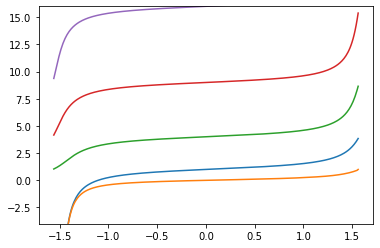

In [4]:
res = 300
halfRes = 150
eps = 10**(-2)
plt.ylim(-4, 16)

gamma = np.linspace(-np.pi/2+eps, np.pi/2-eps, res)

plt.plot(gamma, np.real(np.power(gamma_to_k(np.tan(gamma), 2), 2)/np.pi**2))
plt.plot(gamma, np.real(np.power(gamma_to_k(np.tan(gamma), 1), 2)/np.pi**2))
plt.plot(gamma, np.power(gamma_to_k(np.tan(gamma), 3), 2)/np.pi**2)
plt.plot(gamma, np.power(gamma_to_k(np.tan(gamma), 4), 2)/np.pi**2)
plt.plot(gamma, np.power(gamma_to_k(np.tan(gamma), 5), 2)/np.pi**2)

Text(0, 0.5, 'Energy in units $\\frac{\\pi^2}{L^2 2m}$')

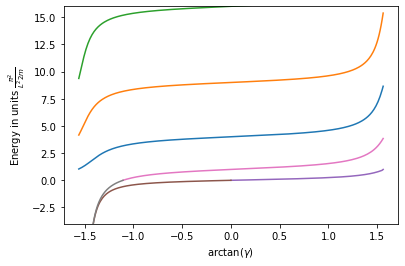

In [37]:
# Case with gamma_- = -gamma_+, using the old convention
# Case with gamma_- = gamma_+, using the new convention  

res = 300
halfRes = 150
eps = 10**(-2)
plt.ylim(-4, 16)

gamma = np.linspace(-np.pi/2+eps, np.pi/2-eps, res)
gammaGreaterZero = np.linspace(0, np.pi/2-eps, halfRes)
gammaSmallerZero = np.linspace(-np.pi/2+eps, 0, halfRes)
gammaGreaterMinusLHlaf = np.linspace(np.arctan(-2), np.pi/2-eps, halfRes)
gammaSmallerMinusLHlaf = np.linspace(-np.pi/2+eps, np.arctan(-2), halfRes)

posRelEven = lambda g, k: g-np.arctan(k*np.tan(k/2))
posRelOdd = lambda g, k: g+np.arctan(k/(np.tan(k/2)))

negRelEven = lambda g, k: g+np.arctan(k*np.tanh(k/2))
negRelOdd = lambda g, k: g+np.arctan(k/np.tanh(k/2))


for i in range(1, 3):
    kGuessPosEven = np.full(res, 2*i)*np.pi
    kGuessPosOdd = np.full(res, (2*i+1))*np.pi

    kSolvePosEven = fsolve(lambda k: posRelEven(gamma, k), kGuessPosEven)
    kSolvePosOdd = fsolve(lambda k: posRelOdd(gamma, k), kGuessPosOdd)

    plt.plot(gamma, np.power(kSolvePosEven,2)/np.pi**2)
    plt.plot(gamma, np.power(kSolvePosOdd,2)/np.pi**2)


# Lowest even state:
kGuessPosLowestEven = np.linspace(0.5, 1, halfRes)*np.pi
KGuessNegLowestEven = -np.tan(gammaSmallerZero)

kSolvePosLowestEven = fsolve(lambda k: posRelEven(gammaGreaterZero, k), kGuessPosLowestEven)
kSolveNegLowestEven = fsolve(lambda k: negRelEven(gammaSmallerZero, k), KGuessNegLowestEven)

plt.plot(gammaGreaterZero, np.power(kSolvePosLowestEven, 2)/np.pi**2)
plt.plot(gammaSmallerZero, -np.power(kSolveNegLowestEven, 2)/np.pi**2)

# Lowest odd state:
kGuessPosLowestOdd = np.full(halfRes, 1)*np.pi
kGuessNegLowestOdd = -np.tan(gammaSmallerMinusLHlaf)

kSolvePosLowestOdd = fsolve(lambda k: posRelOdd(gammaGreaterMinusLHlaf, k), kGuessPosLowestOdd)
kSolveNegLowestOdd = fsolve(lambda k: negRelOdd(gammaSmallerMinusLHlaf, k), kGuessNegLowestOdd)

plt.plot(gammaGreaterMinusLHlaf, np.power(kSolvePosLowestOdd, 2)/np.pi**2)
plt.plot(gammaSmallerMinusLHlaf, -np.power(kSolveNegLowestOdd, 2)/np.pi**2)

plt.xlabel(r"$\arctan(\gamma)$")
plt.ylabel(r"Energy in units $\frac{\pi^2}{L^2 2m}$")

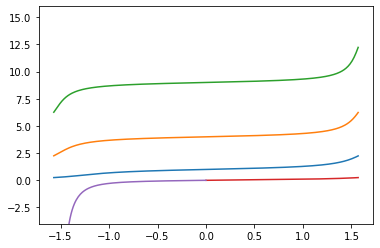

In [7]:
# Case with gamma_- = 0, gamma_+ arbitrary, using the old convention
# Case with gamma_- = 0, gamma_+ arbitrary, using tho new convention

res = 300
eps = 10**(-3)
plt.ylim(-4, 16)

gamma = np.linspace(-np.pi/2+eps, np.pi/2-eps, res)
gammaPos = np.linspace(0, np.pi/2-eps, res//2)
gammaNeg = np.linspace(-np.pi/2+eps, 0, res//2)

posRel = lambda k: np.arctan(k*np.tan(k))-gamma
posRelHalf = lambda k: np.arctan(k*np.tan(k))-gammaPos
negRelHalf = lambda k: np.arctan(k*np.tanh(k))+gammaNeg

for i in range(1, 4):
    kGuess = np.full(res, i)*np.pi
    kSolve = fsolve(posRel, kGuess)
    plt.plot(gamma, np.power(kSolve,2)/np.pi**2)

kPosGuess = np.linspace(0.25, 0.25, res//2)
kPosSolve = fsolve(posRelHalf, kPosGuess)
plt.plot(gammaPos, np.power(kPosSolve,2)/np.pi**2)

kNegGuess = -np.tan(gammaNeg)
kNegSolve = fsolve(negRelHalf, kNegGuess)
plt.plot(gammaNeg, -np.power(kNegSolve, 2)/np.pi**2)

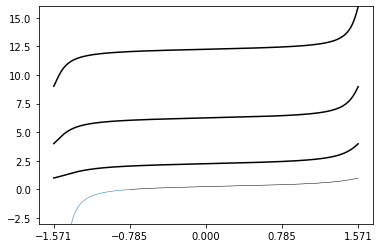

In [8]:
# Case with gamma_- = infinity, gamma_+ arbitrary, using the old convention
# Case with gamma_- = -infinity, gamma_+ arbitrary, using tho new convention

res = 400
eps = 10**(-3)
plt.ylim(-3, 16)
plt.xticks([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2])

gamma = np.linspace(-np.pi/2+eps, np.pi/2-eps, res, endpoint=True)
gammaPos = np.linspace(-np.pi/4, np.pi/2-eps, res//2, endpoint=True)
gammaNeg = np.linspace(-np.pi/2+eps, -np.pi/4, res//2, endpoint=True)

posRel = lambda k: np.arctan(k/np.tan(k))+gamma
posRelHalf = lambda k: np.arctan(k/np.tan(k))+gammaPos
negRelHalf = lambda k: np.arctan(k/np.tanh(k))+gammaNeg

for i in range(1, 4):
    kGuess = np.full(res, i+0.5)*np.pi
    kSolve = fsolve(posRel, kGuess)
    plt.plot(gamma, np.power(kSolve,2)/np.pi**2, "black")

kPosGuess = np.linspace(0.5, 0.5, res//2)*np.pi
kPosSolve = fsolve(posRelHalf, kPosGuess)
plt.plot(gammaPos, np.power(kPosSolve,2)/np.pi**2, "black", linewidth=0.5)
test1 = posRelHalf(kPosSolve)

kNegGuess = -np.tan(gammaNeg)
kNegSolve = fsolve(negRelHalf, kNegGuess)
plt.plot(gammaNeg, -np.power(kNegSolve, 2)/np.pi**2, linewidth=0.5)
'''
gammaNegTest = np.tan(gammaNeg)
negRelHalfTest = lambda k: k/np.tanh(k)+gammaNegTest
kNegGuess = -gammaNegTest
kNegSolveTest = fsolve(negRelHalfTest, kNegGuess)
plt.plot(np.arctan(gammaNegTest), -np.power(kNegSolveTest,2)/np.pi**2, "black")
'''
test = negRelHalf(kNegSolve)

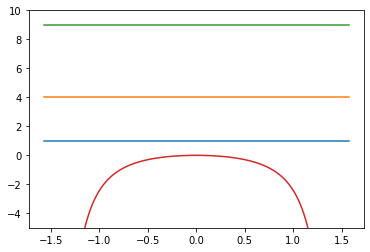

In [32]:
# Case with gamma_- = gamma_+, using the old convention
# Case with gamma_- = -gamma_+, using the new convention  


res = 500
eps = 10**(-3)
plt.ylim(-5, 10)

Gamma = np.linspace(-np.pi/2+eps, np.pi/2-eps, res)

for i in range(1,4):
    plt.plot(Gamma, np.full(res, i**2))

plt.plot(Gamma, -np.power(np.tan(Gamma),2))

1.0031932619807016 1.9936546292625366
2.006385870823946 2.9904834597457786
3.0095772100994003 3.9873142818339637
4.012766608748503 4.984147556755019
0.0 1.0


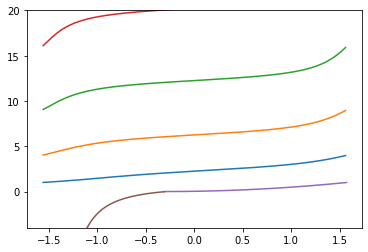

In [3]:
# DEPRECATED

# Case with gamma_- = -infinity, gamma_+ arbitrary using the old convention

res = 500
eps = 10**(-2)
plt.ylim(-4, 20)

Gamma = np.linspace(-np.pi/2+eps, np.pi/2-eps, res)
Rel = lambda k: np.arctan(k/np.tan(k*np.pi))+Gamma

for i in range(1, 5):
    kGuess = np.linspace(i+0.5,i+0.5, res)
    kSolve = fsolve(Rel, kGuess)
    plt.plot(Gamma, np.power(kSolve, 2))
    print(kSolve[0], kSolve[res-1])

GammaPos = np.linspace(-np.arctan(1/np.pi), np.pi/2, res//2)
posRel = lambda k: np.arctan(k/np.tan(k*np.pi))+GammaPos
kGuess = np.linspace(0, 1, res//2)
kSolve = fsolve(posRel, kGuess)
plt.plot(GammaPos, np.power(kSolve,2))
print(kSolve[0], kSolve[res//2-1])

GammaNeg = np.linspace(-np.pi/2, -np.arctan(1/np.pi), res//2)
negRel = lambda k: np.arctan(k/np.tanh(k*np.pi))+GammaNeg
kGuess = -np.tan(GammaNeg)
kSolve = fsolve(negRel, kGuess)
plt.plot(GammaNeg, -np.power(kSolve,2))

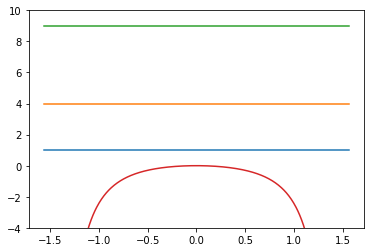

In [4]:
# DEPRECATED

# Case with gamma_- = gamma_+ using the old convention

res = 500
eps = 10**(-2)
plt.ylim(-4, 10)

Gamma = np.linspace(-np.pi/2+eps, np.pi/2-eps, res)

for i in range(1,4):
    plt.plot(Gamma, np.full(res, i**2))

plt.plot(Gamma, -np.power(np.tan(Gamma),2))

In [52]:
a = np.array([-4, -3, -2, -1, 0, 1, 2, 3])

b = np.array([1, 1j, 2, 2j, 3, 4, 5, 6j, 7j])
np.imag(b[np.real(b) == 0])

array([1., 2., 6., 7.])